<h1><b><center>Laboratory work №4</center></b></h1>

<h2><b>Theme:</b> Research and analysis of time series. AR models, ARMA, ARIMA.</h2>

<h3><b>Task:</b> On an individual example: 
<ul>
    <li>investigate the stationarity of the time series;</li>
    <li>build ARIMA(p,d,q) forecasting models with different values of the parameters 
p, d and q and evaluate the results;</li>
</ul></32>

<h3><center>Progress of work</center></h3>

<h4>1. Dataset</h4>

In [196]:
import pandas as pd


In [197]:
import matplotlib.pyplot as plt

In [198]:
df = pd.read_csv('Bitcoin Historical Data.csv')

In [199]:
df['Date'] = pd.to_datetime(df['Date'])

In [228]:
start_date = "2019-08-20"
end_date = "2020-08-20"

df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [229]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price'], inplace=True) 

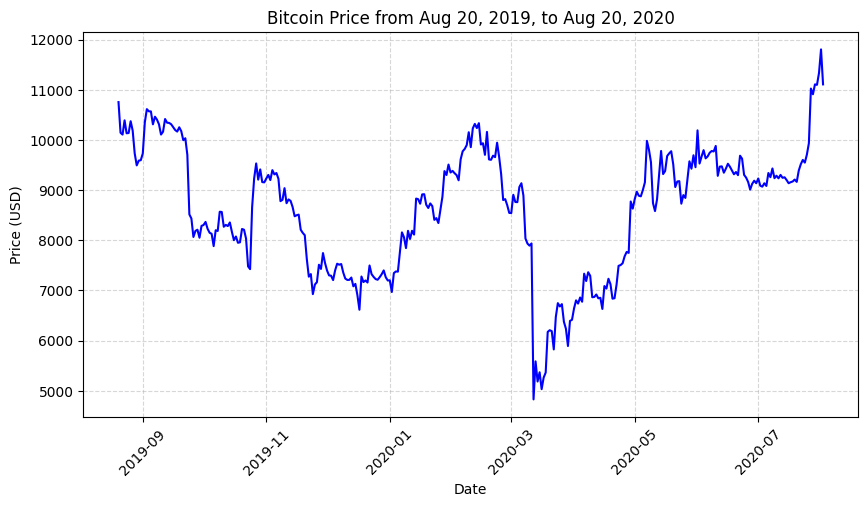

In [230]:
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Date'], df_filtered['Price'], color='blue')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price from Aug 20, 2019, to Aug 20, 2020')

plt.yscale('linear')

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<h5>This plot shows a strong downward trend, which means that the time series is not stationary.</h5>

<h4>2. Augmented Dickey-Fuller (ADF) test</h4>

In [203]:
import numpy as np

In [206]:
from statsmodels.tsa.stattools import adfuller

In [207]:
result = adfuller(df["Price"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] > 0.05:
    print("The series is NOT stationary (p-value > 0.05).")
else:
    print("The series is stationary (p-value ≤ 0.05).")

ADF Statistic: -2.3379442725971007
p-value: 0.16002197620025005
Critical Values: {'1%': np.float64(-3.4331274442355406), '5%': np.float64(-2.862767027390171), '10%': np.float64(-2.567423199732371)}
The series is NOT stationary (p-value > 0.05).


<table>
    <tr> <th>ADF Statistic</th> <th>p-value</th> <th></th><th>Critical values</th><th></th></tr>
    <tr><th></th> <th></th> <th>1%</th> <th>5%</th> <th>10%</th></tr>
    <tr> <th>-2.3379442725971007</th> <th>0.16002197620025005</th> <th>-3.4331274442355406</th> <th>-2.862767027390171</th> <th>-2.567423199732371</th></tr>
</table>

<h4>3. Autocorrelation function (ACF) and PACF tests</h4>

In [208]:
from statsmodels.graphics.tsaplots import plot_acf

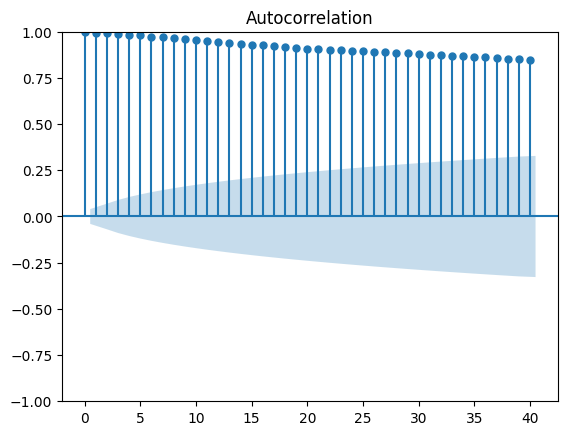

In [209]:
plot_acf(df['Price'], lags=40)
plt.show()

In [210]:
from statsmodels.graphics.tsaplots import plot_pacf

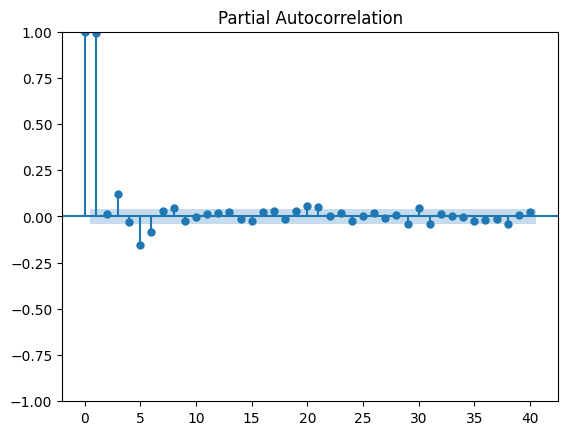

In [211]:
plot_pacf(df['Price'], lags=40)
plt.show()

<h4>4. Differencing the data</h4>

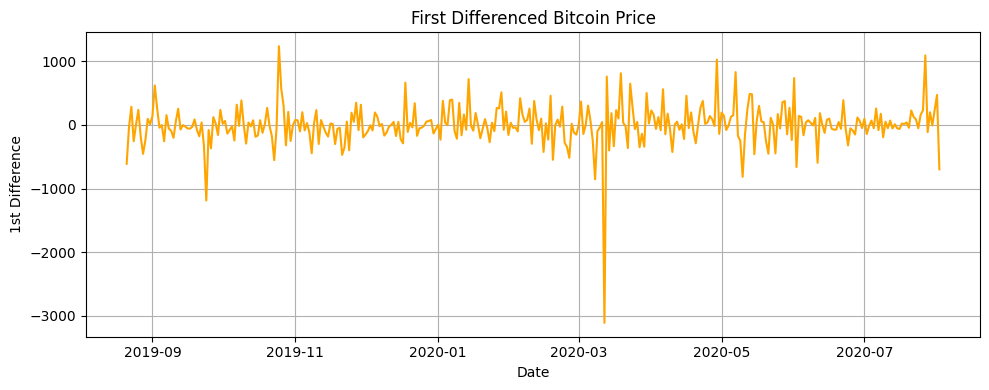

In [221]:
df = pd.read_csv('Bitcoin Historical Data.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Price'] = df['Price'].str.replace(',', '').astype(float)

mask = (df['Date'] >= '2019-08-20') & (df['Date'] <= '2020-08-20')
df_filtered = df.loc[mask].copy()

df_filtered = df_filtered.sort_values('Date')
df_filtered.set_index('Date', inplace=True)

df_filtered['First Diff'] = df_filtered['Price'].diff()

plt.figure(figsize=(10, 4))
plt.plot(df_filtered['First Diff'], label='First Difference', color='orange')
plt.title('First Differenced Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('1st Difference')
plt.grid(True)
plt.tight_layout()
plt.show()

In [222]:
result_first_diff = adfuller(df_filtered["First Diff"].dropna())

print("\nADF Test on First Differenced Data:")
print("ADF Statistic:", result_first_diff[0])
print("p-value:", result_first_diff[1])
print("Critical Values:", result_first_diff[4])

if result_first_diff[1] > 0.05:
    print("The first differenced series is NOT stationary (p-value > 0.05).")
else:
    print("The first differenced series is stationary (p-value ≤ 0.05).")


ADF Test on First Differenced Data:
ADF Statistic: -11.306863331161884
p-value: 1.2669917589311647e-20
Critical Values: {'1%': np.float64(-3.4494474563375737), '5%': np.float64(-2.8699542285903887), '10%': np.float64(-2.5712527305187987)}
The first differenced series is stationary (p-value ≤ 0.05).


<table>
    <tr> <th>ADF Statistic</th> <th>p-value</th> <th></th><th>Critical values</th><th></th></tr>
    <tr><th></th> <th></th> <th>1%</th> <th>5%</th> <th>10%</th></tr>
    <tr> <th>-11.306863331161884</th> <th>1.2669917589311647e-20</th> <th>-3.4494474563375737</th> <th>-2.8699542285903887</th> <th>-2.5712527305187987</th></tr>
</table>

Text(0.5, 1.0, 'ACF of First Differenced Bitcoin Price')

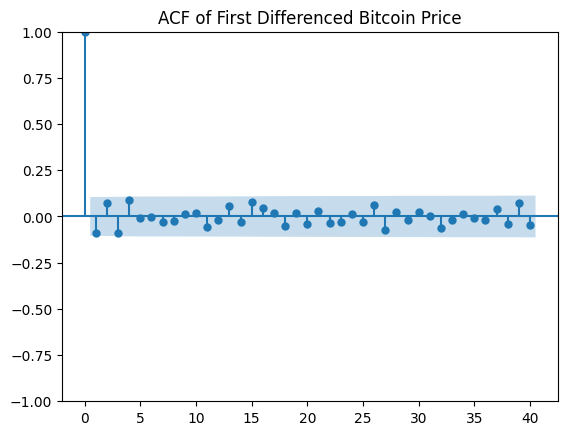

In [223]:
plot_acf(df_filtered['First Diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF of First Differenced Bitcoin Price')

Text(0.5, 1.0, 'PACF of First Differenced Bitcoin Price')

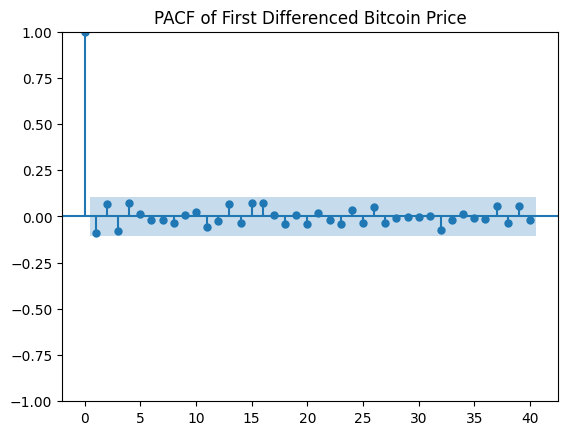

In [224]:
plot_pacf(df_filtered['First Diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF of First Differenced Bitcoin Price')

<h3>ARIMA</h3>

D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  349
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2499.068
Date:                Sat, 12 Apr 2025   AIC                           5004.137
Time:                        14:54:18   BIC                           5015.693
Sample:                    08-20-2019   HQIC                          5008.737
                         - 08-02-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7343      0.210     -3.502      0.000      -1.145      -0.323
ma.L1          0.6359      0.229      2.777      0.005       0.187       1.085
sigma2      1.009e+05   2206.706     45.747      0.0

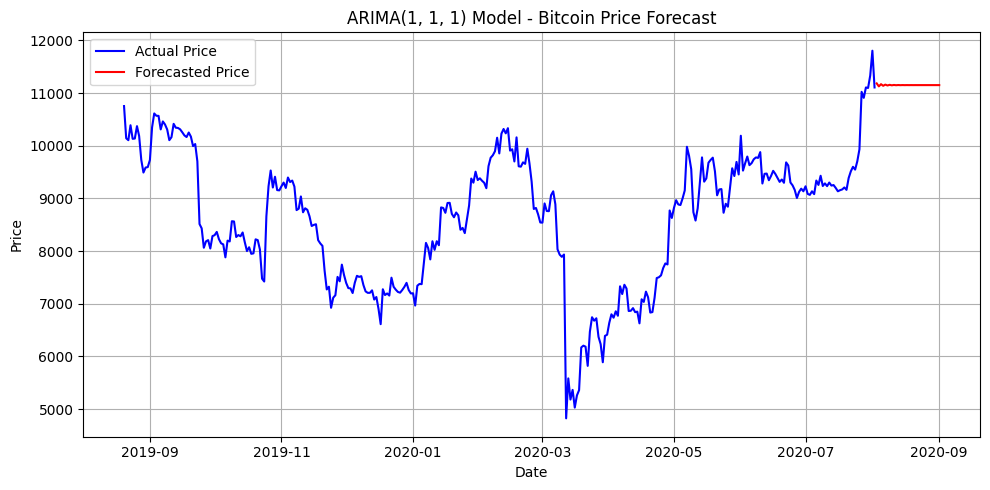

In [225]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# ---- ARIMA(1, 1, 1) Model ----
model = ARIMA(df_filtered['Price'], order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

print(model_fit.summary())

forecast_steps = 30 
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered['Price'], label='Actual Price', color='blue')
plt.plot(pd.date_range(df_filtered.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecasted Price', color='red')
plt.title('ARIMA(1, 1, 1) Model - Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

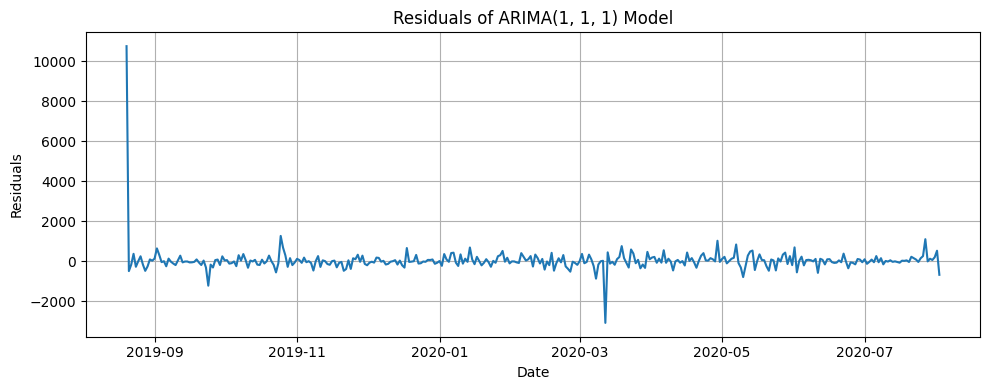

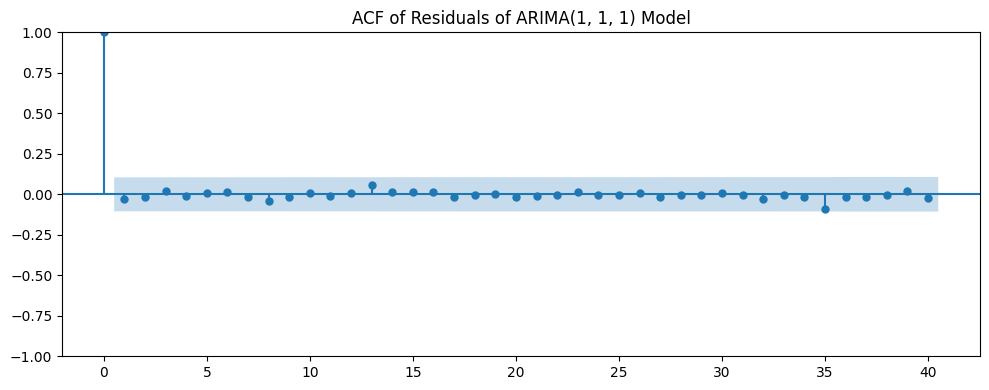

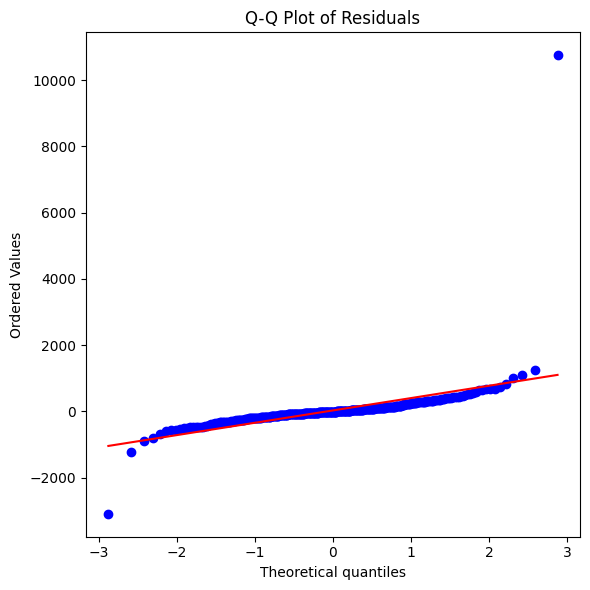

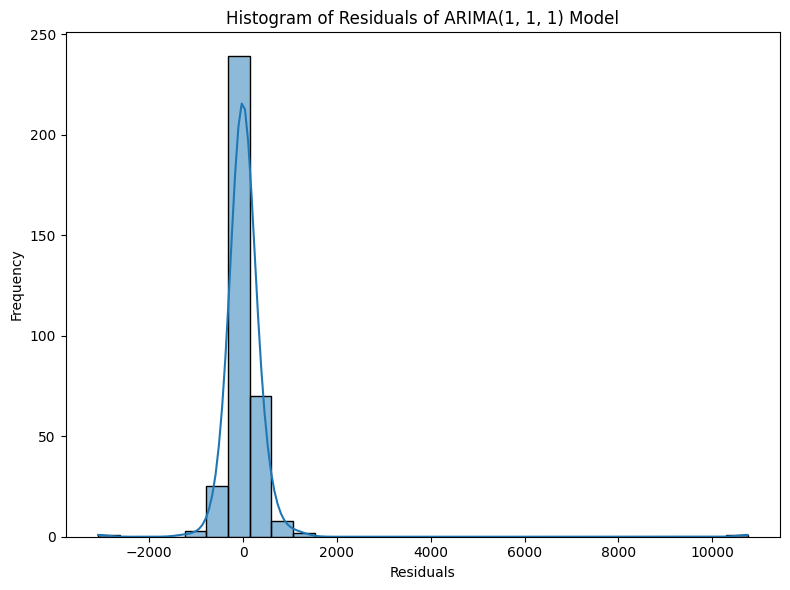

In [226]:
import seaborn as sns
import scipy.stats as stats
# ---- Residuals ----
residuals = model_fit.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA(1, 1, 1) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals of ARIMA(1, 1, 1) Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals of ARIMA(1, 1, 1) Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


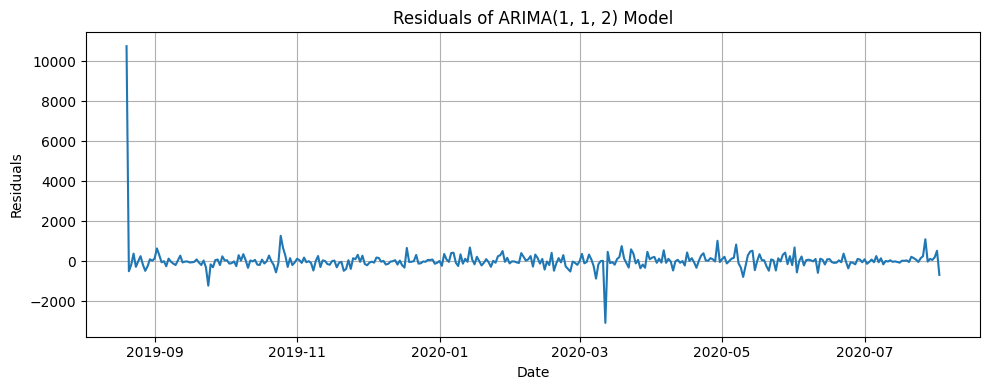

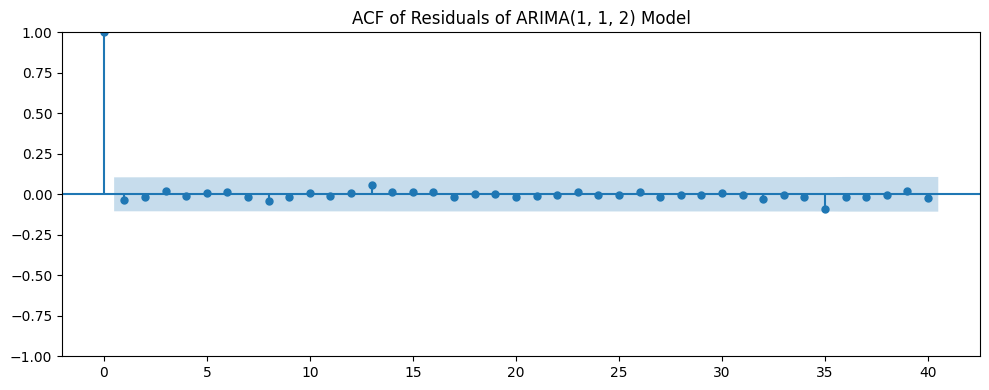

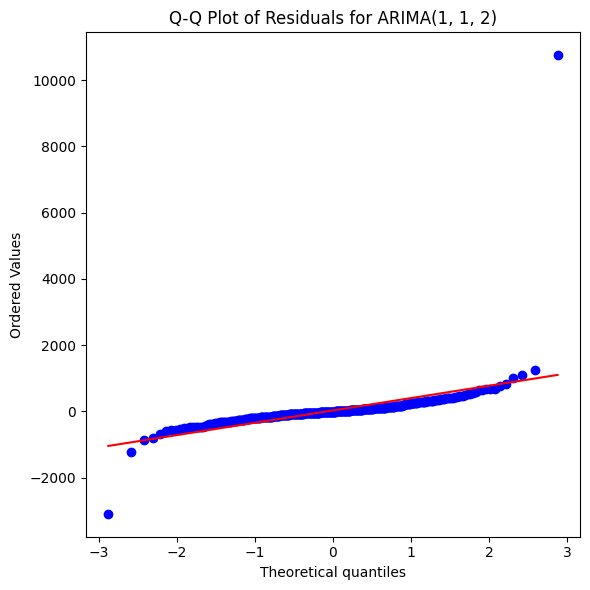

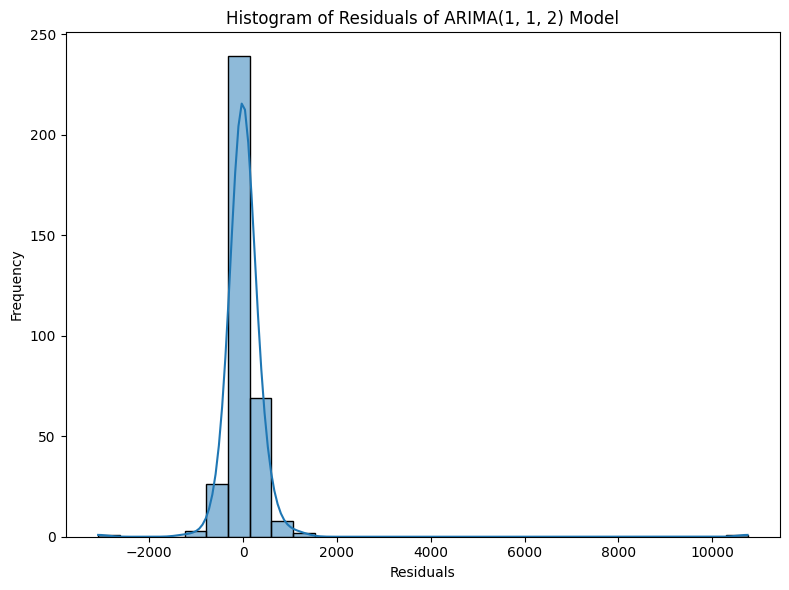

D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

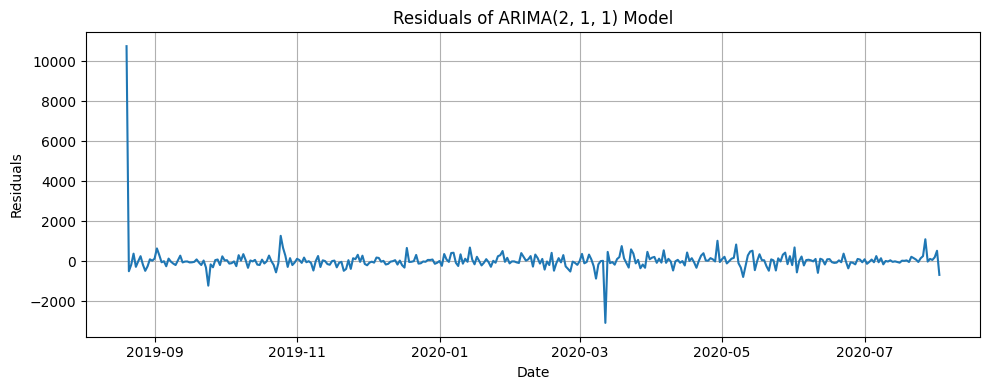

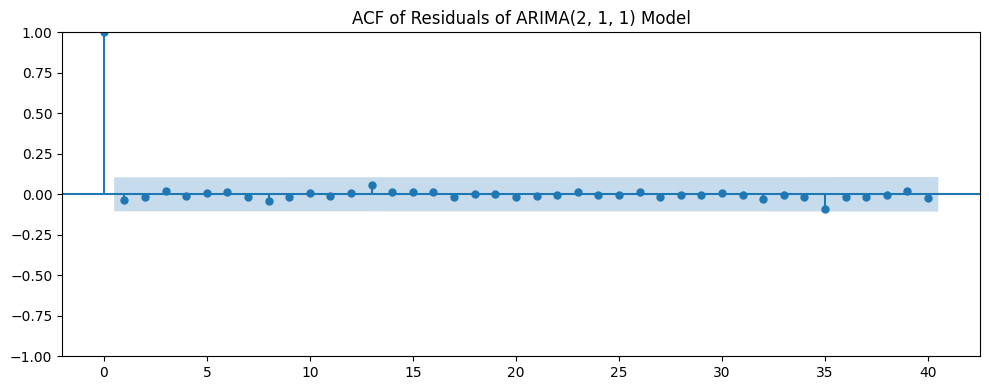

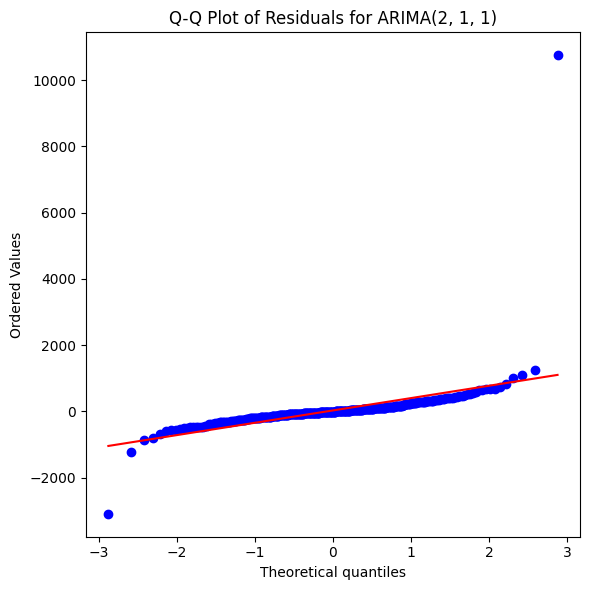

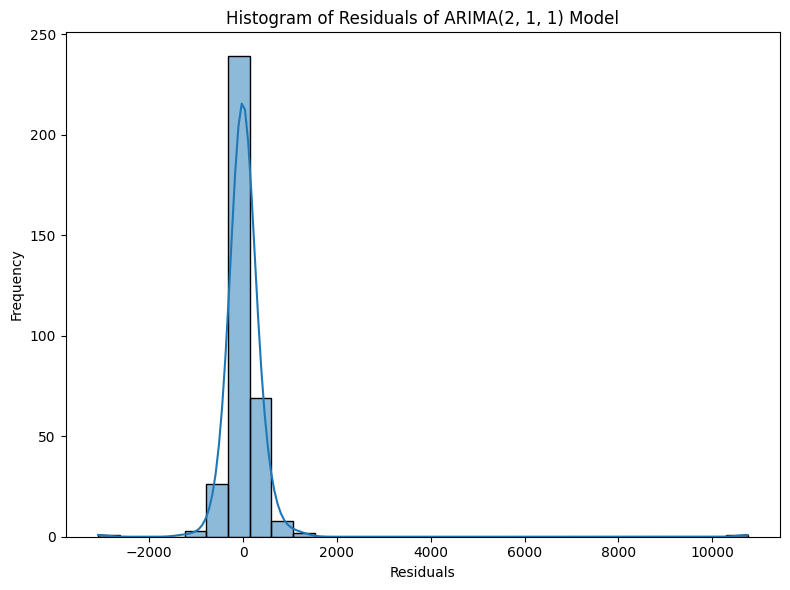

D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\uni\3year\py\envs\first\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


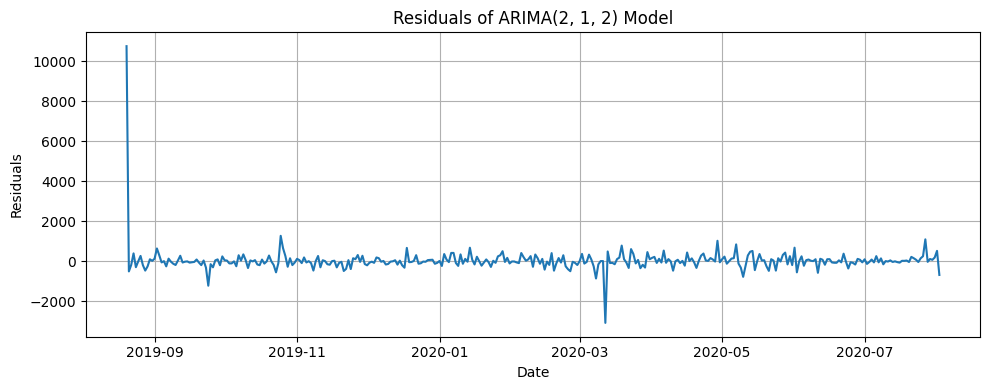

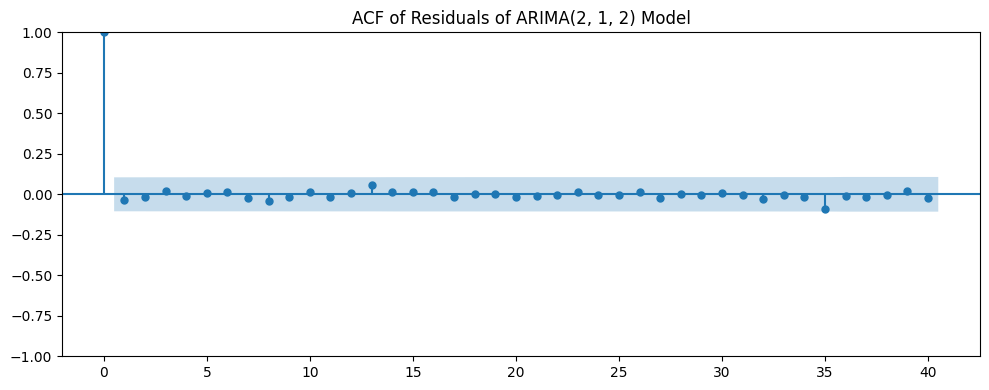

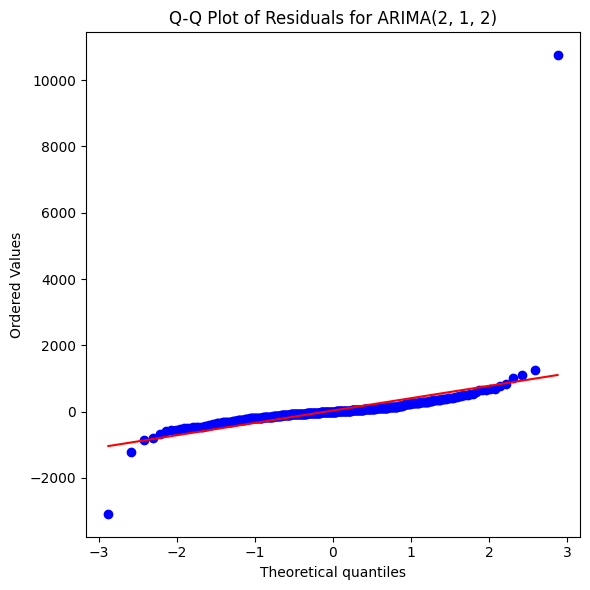

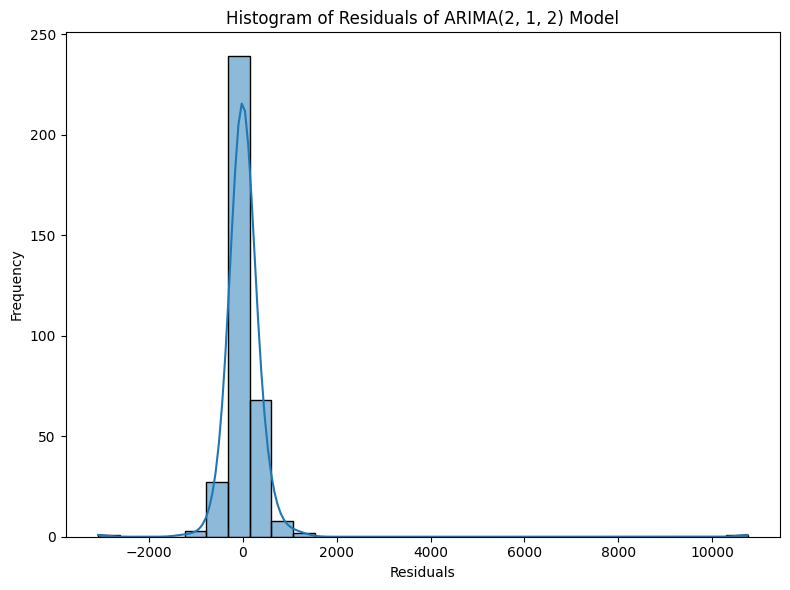

In [227]:
def plot_residuals(model_fit, model_order):
    residuals = model_fit.resid
    
    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Residuals of ARIMA{model_order} Model')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plot_acf(residuals, lags=40, ax=plt.gca())
    plt.title(f'ACF of Residuals of ARIMA{model_order} Model')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Residuals for ARIMA{model_order}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'Histogram of Residuals of ARIMA{model_order} Model')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# ARIMA(1, 1, 2)
model_1_1_2 = ARIMA(df_filtered['Price'], order=(1, 1, 2))
model_fit_1_1_2 = model_1_1_2.fit()
plot_residuals(model_fit_1_1_2, "(1, 1, 2)")

# ARIMA(2, 1, 1)
model_2_1_1 = ARIMA(df_filtered['Price'], order=(2, 1, 1))
model_fit_2_1_1 = model_2_1_1.fit()
plot_residuals(model_fit_2_1_1, "(2, 1, 1)")

# ARIMA(2, 1, 2)
model_2_1_2 = ARIMA(df_filtered['Price'], order=(2, 1, 2))
model_fit_2_1_2 = model_2_1_2.fit()
plot_residuals(model_fit_2_1_2, "(2, 1, 2)")